# Phase 2

### Here we will define a class that will ingest the dataset, and then iterates through the columns, giving us diffrent visualizations that interpret the insights hidden in the data.

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I will load the dataset derived from Phase 1

data = pd.read_csv(r"c:\Users\USER\Desktop\A2F-2023-Revised-dataset-with-Revised-weights\data2.csv")

# I had checked this earlier. Have to convert the 'bank_account_ownership' column to "object"

data['bank_account_ownership'] = data['bank_account_ownership'].map({
    1.0: "Yes",  # Indicates the person has a bank account
    0.0: "No"    # Indicates the person does not have a bank account
}).fillna("Unknown")  # Handle NaN values by assigning "Unknown"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   state                        28392 non-null  object
 1   bank_account_ownership       28392 non-null  object
 2   financial_inclusion_metrics  28392 non-null  int64 
 3   demographic_factors          28392 non-null  object
 4   savings_behavior             28392 non-null  object
 5   borrowing_behavior           28392 non-null  object
 6   digital_payment_adoption     28392 non-null  object
 7   access_to_electricity        28392 non-null  object
 8   internet_access              28392 non-null  object
 9   mobile_phone_usage           28392 non-null  object
 10  credit_access                28392 non-null  object
 11  small_business_ownership     28392 non-null  object
 12  entrepreneurship             28392 non-null  object
dtypes: int64(1), object(12)
memory 

### **How the Class Works**
1. **Initialization (`__init__`)**:
   - The class takes the dataset (`data`) as input during initialization.

2. **Methods**:
   - Each method corresponds to one of the 10 questions and generates only the most relevant visualization(s) to answer that question.

3. **Visualizations**:
   - Only the most appropriate visualizations are used for each question to ensure clarity and relevance.

---

In [2]:

class FinancialInclusionAnalysis:
    def __init__(self, data):
        """
        Initialize the class with the dataset.
        """
        self.data = data

    def plot_bank_account_ownership_distribution(self):
        """
        Question 1: Distribution of Bank Account Ownership
        What is the distribution of bank account ownership (bank_account_ownership) across different states/territories?
        
        Parameters:
            data (pd.DataFrame): The dataset containing 'state' and 'bank_account_ownership' columns.
        """
        # Step 1: Group and Aggregate Data to Sort States by "Yes" Counts
        grouped_data = (
            self.data.groupby(['state', 'bank_account_ownership'])
            .size()
            .unstack(fill_value=0)
        )
        
        # Sort states by "Yes" counts in descending order
        grouped_data['total_yes'] = grouped_data['Yes']  # Extract "Yes" counts
        sorted_states = grouped_data.sort_values(by='total_yes', ascending=False).index
        
        # Reorder grouped_data to match the sorted states
        grouped_data = grouped_data.loc[sorted_states]
        
        # Print the aggregated data for verification
        print("Bank Account Ownership by State:")
        print(grouped_data[['Yes', 'No']])
        
        # Step 2: Plot the Countplot
        plt.figure(figsize=(24, 18))  # Increase figure size for better spacing

        # Create the countplot with adjusted bar width and spacing
        sns.countplot(
            data=self.data,
            y='state',
            hue='bank_account_ownership',
            order=sorted_states,  # Use sorted states
            hue_order=['Yes', 'No'],  # Ensure "Yes" appears first
            palette={'Yes': 'green', 'No': 'red'},
            saturation=0.5,  # Reduce saturation to 50%
            dodge=True,      # Ensure "Yes" and "No" are side by side
            width=0.8        # Adjust bar width to create space between pairs
        )

        # Add title and labels
        plt.title("Bank Account Ownership by State", fontsize=40)
        plt.xlabel("Count", fontsize=38)
        plt.ylabel("State", fontsize=32)
        
        # Increase y-axis label size by 50%
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)  # Increase font size of y-axis labels
        
        # Adjust legend font sizes
        plt.legend(title="Bank Account Ownership", fontsize=16, title_fontsize=18)

        # Adjust layout to prevent overlap
        plt.tight_layout()

        # Show the plot
        plt.show()


    def analyze_infrastructure_and_financial_inclusion(self):
        """
        Question 2: Infrastructure and Financial Inclusion
        How does access to infrastructure (e.g., access_to_electricity, internet_access, mobile_phone_usage) correlate with financial inclusion metrics such as bank account ownership, digital payment adoption, and credit access?
        
        Best Visualization: Scatterplot of Internet Access vs Financial Inclusion Metrics
        """
        # Scatterplot: Internet Access vs Financial Inclusion Metrics
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.data, x='internet_access', y='financial_inclusion_metrics', hue='access_to_electricity', palette='Set2')
        plt.title("Internet Access vs Financial Inclusion Metrics", fontsize=16)
        plt.xlabel("Internet Access", fontsize=12)
        plt.ylabel("Financial Inclusion Metrics", fontsize=12)
        plt.tight_layout()
        plt.show()

    def analyze_barriers_to_financial_inclusion(self):
        """
        Question 3: Barriers to Financial Inclusion
        What are the primary barriers to financial inclusion for individuals who do not own a bank account (bank_account_ownership = No)?
        
        Best Visualization: Count Plot of Barriers to Financial Inclusion
        """
        # Count Plot: Barriers to Financial Inclusion
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.data, y='barriers_to_inclusion', palette='magma', order=self.data['barriers_to_inclusion'].value_counts().index[::-1])
        plt.title("Barriers to Financial Inclusion", fontsize=16)
        plt.xlabel("Count", fontsize=12)
        plt.ylabel("Barrier", fontsize=12)
        plt.tight_layout()
        plt.show()

    def analyze_savings_behavior(self):
        """
        Question 4: Savings Behavior Across Groups
        How do savings behaviors vary across demographic groups and geographic regions?
        
        Best Visualization: Grouped Bar Chart of Savings Behavior by Demographic Factors
        """
        # Grouped Bar Chart: Savings Behavior by Demographic Factors
        plt.figure(figsize=(12, 6))
        sns.barplot(data=self.data, x='demographic_factors', y='savings_behavior', hue='bank_account_ownership', palette='Set1')
        plt.title("Savings Behavior by Demographic Factors and Bank Account Ownership", fontsize=16)
        plt.xlabel("Demographic Factors", fontsize=12)
        plt.ylabel("Savings Behavior", fontsize=12)
        plt.legend(title="Bank Account Ownership")
        plt.tight_layout()
        plt.show()

    def analyze_borrowing_behavior_and_credit_access(self):
        """
        Question 5: Borrowing Behavior and Credit Access
        What is the relationship between borrowing behavior and access to credit?
        
        Best Visualization: Boxplot of Borrowing Behavior vs Credit Access
        """
        # Boxplot: Borrowing Behavior vs Credit Access
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.data, x='credit_access', y='borrowing_behavior', palette='Set2')
        plt.title("Borrowing Behavior vs Credit Access", fontsize=16)
        plt.xlabel("Credit Access", fontsize=12)
        plt.ylabel("Borrowing Behavior", fontsize=12)
        plt.tight_layout()
        plt.show()

    def analyze_digital_payment_adoption_trends(self):
        """
        Question 6: Digital Payment Adoption Trends
        What trends can be observed in digital payment adoption across demographic groups and geographic regions?
        
        Best Visualization: Pie Chart of Digital Payment Adoption by Urban/Rural
        """
        # Pie Chart: Digital Payment Adoption by Urban/Rural
        plt.figure(figsize=(8, 6))
        rural_urban_digital = self.data.groupby('urban_rural')['digital_payment_adoption'].value_counts(normalize=True).unstack()
        rural_urban_digital.plot(kind='pie', subplots=True, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], figsize=(8, 6))
        plt.title("Digital Payment Adoption: Rural vs Urban", fontsize=14)
        plt.ylabel("")
        plt.tight_layout()
        plt.show()

    def analyze_entrepreneurship_and_small_business(self):
        """
        Question 7: Entrepreneurship and Small Business Ownership
        How does entrepreneurship correlate with small business ownership and access to credit?
        
        Best Visualization: Scatterplot of Entrepreneurship vs Credit Access
        """
        # Scatterplot: Entrepreneurship vs Credit Access
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.data, x='credit_access', y='entrepreneurship', hue='small_business_ownership', palette='tab20')
        plt.title("Entrepreneurship vs Credit Access by Small Business Ownership", fontsize=16)
        plt.xlabel("Credit Access", fontsize=12)
        plt.ylabel("Entrepreneurship", fontsize=12)
        plt.tight_layout()
        plt.show()

    def analyze_financial_resilience_and_opportunities(self):
        """
        Question 8: Financial Resilience and Economic Opportunities
        How do financial resilience metrics relate to broader economic opportunities such as entrepreneurship?
        
        Best Visualization: Violin Plot of Financial Resilience vs Entrepreneurship
        """
        # Violin Plot: Financial Resilience vs Entrepreneurship
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=self.data, x='finhealth_resilience', y='entrepreneurship', palette='rainbow')
        plt.title("Financial Resilience vs Entrepreneurship", fontsize=16)
        plt.xlabel("Financial Resilience", fontsize=12)
        plt.ylabel("Entrepreneurship", fontsize=12)
        plt.tight_layout()
        plt.show()

    def analyze_correlations_between_financial_inclusion_metrics(self):
        """
        Question 9: Correlations Between Financial Inclusion Metrics
        What relationships exist between various financial inclusion metrics?
        
        Best Visualization: Pairplot of Financial Inclusion Metrics
        """
        # Pairplot: Relationships Between Financial Inclusion Metrics
        metrics = ['bank_account_ownership', 'savings_behavior', 'borrowing_behavior', 'digital_payment_adoption']
        sns.pairplot(self.data[metrics], diag_kind='kde', palette='husl')
        plt.suptitle("Pairwise Relationships Between Financial Inclusion Metrics", fontsize=16, y=1.02)
        plt.show()

    def analyze_role_of_demographic_factors(self):
        """
        Question 10: Role of Demographic Factors
        Which demographic factors are the strongest predictors of financial inclusion?
        
        Best Visualization: Heatmap of Correlations Between Demographic Factors and Bank Account Ownership
        """
        # Heatmap: Correlation Between Demographic Factors and Bank Account Ownership
        pivot_table = pd.crosstab(self.data['demographic_factors'], self.data['bank_account_ownership'])
        plt.figure(figsize=(10, 8))
        sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
        plt.title("Correlation: Demographic Factors vs Bank Account Ownership", fontsize=16)
        plt.xlabel("Bank Account Ownership", fontsize=12)
        plt.ylabel("Demographic Factors", fontsize=12)
        plt.tight_layout()
        plt.show()

### 1. Distribution of Bank Account Ownership
Question :
What is the distribution of bank account ownership (bank_account_ownership) across different states/territories? Are there any significant correlations with demographic factors (demographic_factors) or access to infrastructure (e.g., access_to_electricity, internet_access)?

Bank Account Ownership by State:
bank_account_ownership  Yes   No
state                           
LAGOS                   705   63
OYO                     698   71
OGUN                    692   62
OSUN                    667   92
FCT                     661  113
ONDO                    660  116
DELTA                   639  115
EDO                     637  140
BAYELSA                 621  147
KOGI                    613  113
EKITI                   610  170
KWARA                   605  185
CROSS RIVER             542  219
RIVERS                  535  198
ANAMBRA                 533  242
EBONYI                  518  266
AKWA IBOM               517  256
ENUGU                   513  255
ABIA                    510  273
BENUE                   485  301
IMO                     470  306
NASARAWA                445  340
ADAMAWA                 419  369
GOMBE                   390  381
PLATEAU                 379  386
TARABA                  372  408
KADUNA                  365  409
NIGER     

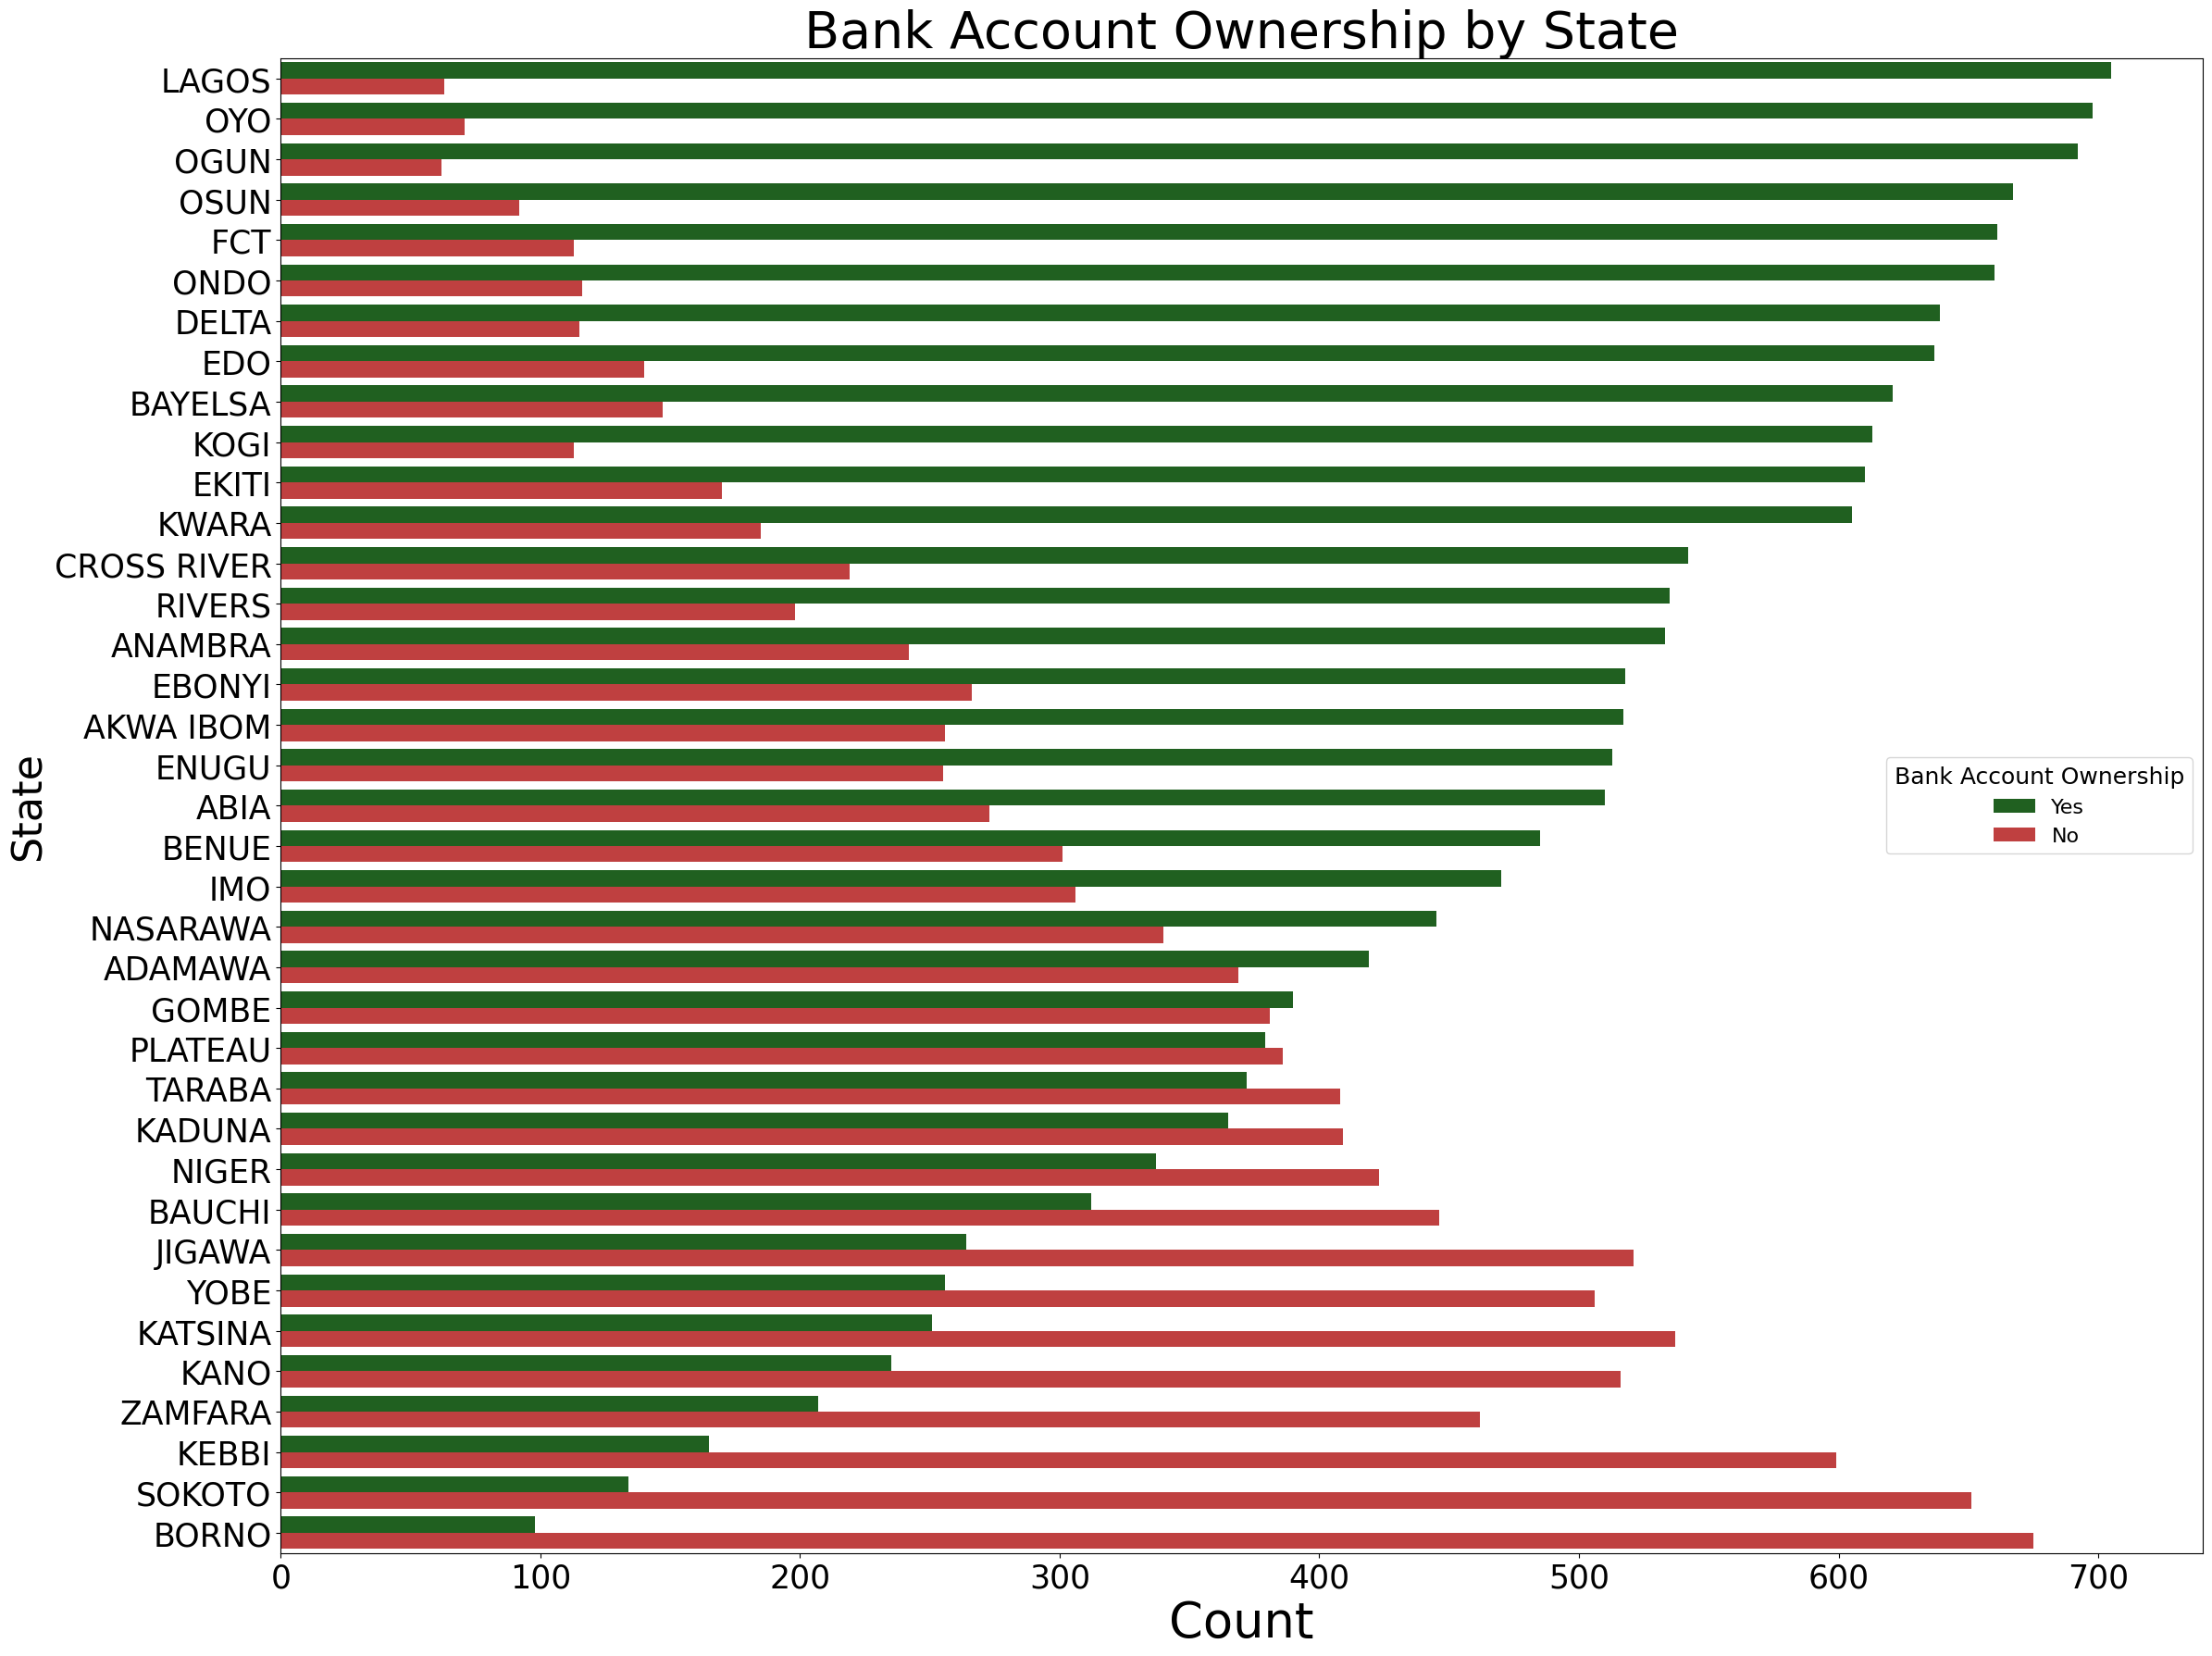

In [3]:
# Instantiate an object of the class
analysis = FinancialInclusionAnalysis(data)

# Call the method for Question 1
analysis.plot_bank_account_ownership_distribution()

Based on the data, states like **Lagos, Oyo, and Ogun** show high levels of bank account ownership, suggesting strong economic opportunities and financial inclusion. In contrast, states like **Borno, Sokoto, and Kebbi** exhibit significantly lower adoption rates, highlighting the need for targeted interventions such as mobile banking solutions, financial literacy programs, and incentives to encourage formal financial participation in these regions.